In [1]:
# Import important Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [4]:
# Load dataset
df = pd.read_csv("Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [6]:
# Convert Dates to date-time
df['Dates']  = pd.to_datetime(df['Dates'])
df = df.sort_values('Dates')

# Display first few rows:
print("Date Preview")
df.head()

Date Preview


C:\Users\k8011\AppData\Local\Temp\ipykernel_16292\3945407582.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates']  = pd.to_datetime(df['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


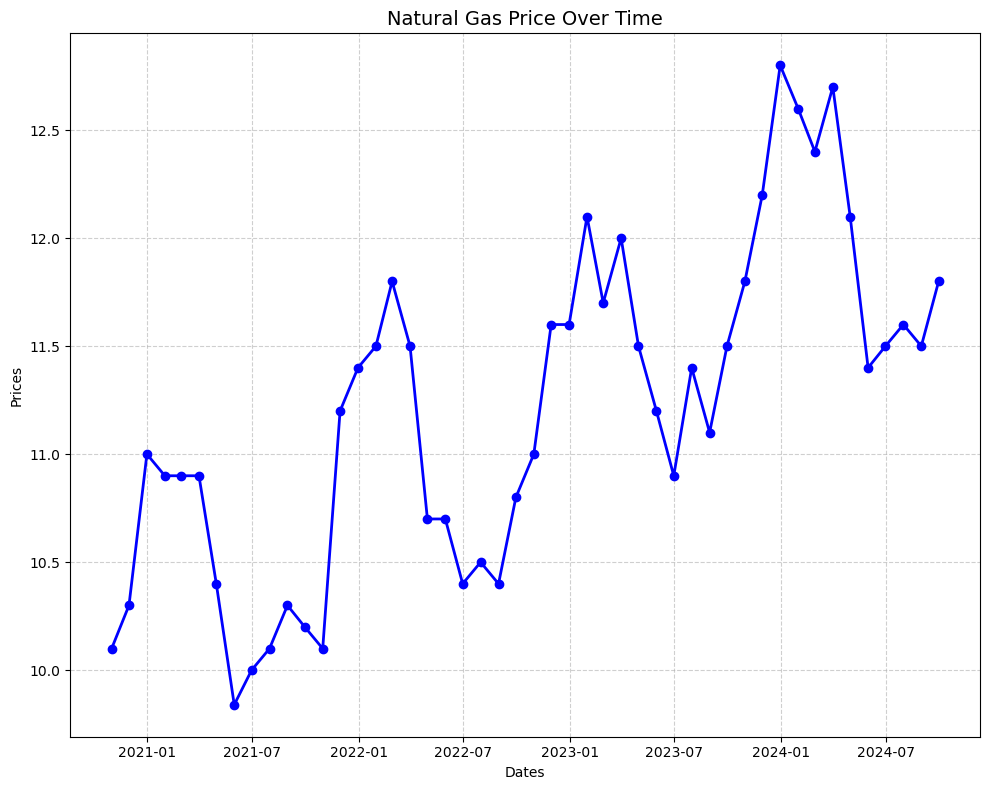

In [11]:
# Explore and visualize the data

plt.figure(figsize=(10,8))
plt.plot(df["Dates"], df["Prices"], color="Blue", marker='o', linewidth='2')
plt.title("Natural Gas Price Over Time", fontsize=14)
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [15]:
# --------------------------------------------------------
# Step 3️⃣: Prepare the data for prediction
# --------------------------------------------------------
# Convert dates to numeric (number of days since start)
df['Days'] = (df['Dates'] - df['Dates'].min()).dt.days

In [19]:
# Create features (X) and labels (y)
x = df[['Days']]
y = df['Prices']


In [20]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [22]:
# --------------------------------------------------------
# Step 4️⃣: Predict prices for the next 12 months
# --------------------------------------------------------
# Generate next 12 months from the last date in dataset
future_dates = pd.date_range(start=df['Dates'].max(), periods=13, freq='M')[1:]
future_days = (future_dates - df['Dates'].min()).days.values.reshape(-1, 1)


C:\Users\k8011\AppData\Local\Temp\ipykernel_16292\1444879380.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df['Dates'].max(), periods=13, freq='M')[1:]


In [23]:
# Predict future prices
future_prices = model.predict(future_days)

C:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
# Combine into a DataFrame
future_df = pd.DataFrame({
    'Dates': future_dates,
    'Predicted_Price': future_prices
})


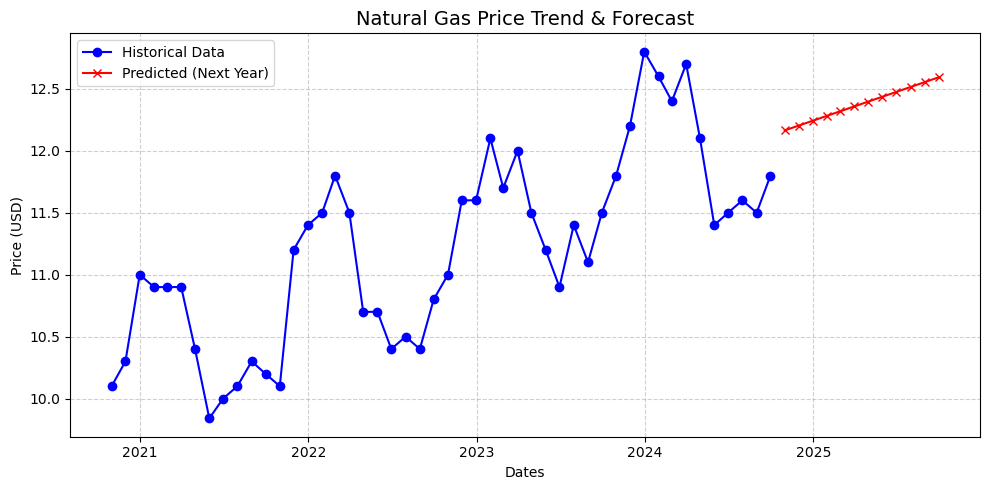

In [30]:
# --------------------------------------------------------
# Step 5️⃣: Visualize past and predicted prices
# --------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(df['Dates'], df['Prices'], label='Historical Data', marker='o', color='blue')
plt.plot(future_df['Dates'], future_df['Predicted_Price'], label='Predicted (Next Year)', marker='x', color='red')
plt.title("Natural Gas Price Trend & Forecast", fontsize=14)
plt.xlabel("Dates")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [31]:
# --------------------------------------------------------
# Step 6️⃣: Create a function to estimate price for any date
# --------------------------------------------------------
def estimate_price(input_date):
    """
    Function to estimate the natural gas price for any given date.
    Example: estimate_price('2025-03-31')
    """
    input_date = pd.to_datetime(input_date)
    days = (input_date - df['Dates'].min()).days
    predicted_price = model.predict(np.array([[days]]))[0]
    return round(predicted_price, 2)


In [32]:
# Example use
print("💡 Estimated price for 2025-03-31:", estimate_price("2025-03-31"))


# --------------------------------------------------------
# ✅ End of Project
# --------------------------------------------------------


💡 Estimated price for 2025-03-31: 12.36


C:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
